Crea un notebook, carga los csv. responde y justifica.
El notebook se debe entregar y debe ser posible visualizar los resultados de cada pregunta:

El campo TotalPrice en la tabla sales no tiene valores válidos. Utilizando la información de precios de la tabla products, calcula el valor real de la venta para cada registro y almacena en una nueva columna

Utiliza la siguiente fórmula:

TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)

In [1]:
# mportar Librerías y Cargar CSV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los conjuntos de datos
# Como los archivos están en la misma carpeta, los cargamos directamente.
try:
    df_sales = pd.read_csv('sales.csv')
    df_products = pd.read_csv('products.csv')
    
    print("¡Archivos CSV cargados exitosamente!")
except FileNotFoundError:
    print("No se pudo continuar sin los archivos.")
    # Si realmente no se encuentran, se podría salir o levantar una excepción.
    # Por ahora, simplemente imprimimos un mensaje de error.

# Mostrar las primeras filas de cada DataFrame para verificar la carga
print("\n--- Primeras filas del DataFrame de Ventas (df_sales) ---")
print(df_sales.head())

print("\n--- Primeras filas del DataFrame de Productos (df_products) ---")
print(df_products.head())


# Mostrar la información de las columnas de Sales para identificar 'SalesDate' y otros tipos
print("\n--- Información del DataFrame de Ventas (df_sales.info()) ---")
df_sales.info()

¡Archivos CSV cargados exitosamente!

--- Primeras filas del DataFrame de Ventas (df_sales) ---
   SalesID  SalesPersonID  CustomerID  ProductID  Quantity  Discount  \
0        1              6       27039        381         7       0.0   
1        2             16       25011         61         7       0.0   
2        3             13       94024         23        24       0.0   
3        4              8       73966        176        19       0.2   
4        5             10       32653        310         9       0.0   

   TotalPrice                SalesDate     TransactionNumber  
0         0.0  2018-02-05 07:38:25.430  FQL4S94E4ME1EZFTG42G  
1         0.0  2018-02-02 16:03:31.150  12UGLX40DJ1A5DTFBHB8  
2         0.0  2018-05-03 19:31:56.880  5DT8RCPL87KI5EORO7B0  
3         0.0  2018-04-07 14:43:55.420  R3DR9MLD5NR76VO17ULE  
4         0.0  2018-02-12 15:37:03.940  4BGS0Z5OMAZ8NDAFHHP3  

--- Primeras filas del DataFrame de Productos (df_products) ---
   ProductID                

TOTALPRICECALCULATED

In [2]:
#TotalPriceCalculated

# Merge sales y products DataFrames para obtener price
# Se utiliza un 'left merge' para mantener todas las ventas y añadir el precio unitario del producto.
df_merged = pd.merge(df_sales, df_products[['ProductID', 'Price']], on='ProductID', how='left')

# Calcular TotalPriceCalculated utilizando la fórmula proporcionada
# TotalPriceCalculated = (Quantity × price) × (1 − Discount)
df_merged['TotalPriceCalculated'] = (df_merged['Quantity'] * df_merged['Price']) * (1 - df_merged['Discount'])

# Mostrar las primeras filas del DataFrame con la nueva columna 'TotalPriceCalculated'
print("--- DataFrame con 'TotalPriceCalculated' calculada ---")
print(df_merged[['SalesID', 'ProductID', 'Quantity', 'Discount', 'Price', 'TotalPrice', 'TotalPriceCalculated']].head())

# Opcional: Mostrar estadísticas descriptivas de la nueva columna
print("\n--- Estadísticas Descriptivas de TotalPriceCalculated ---")
print(df_merged['TotalPriceCalculated'].describe())

--- DataFrame con 'TotalPriceCalculated' calculada ---
   SalesID  ProductID  Quantity  Discount    Price  TotalPrice  \
0        1        381         7       0.0  44.2337         0.0   
1        2         61         7       0.0  62.5460         0.0   
2        3         23        24       0.0  79.0184         0.0   
3        4        176        19       0.2  81.3167         0.0   
4        5        310         9       0.0  79.9780         0.0   

   TotalPriceCalculated  
0             309.63590  
1             437.82200  
2            1896.44160  
3            1236.01384  
4             719.80200  

--- Estadísticas Descriptivas de TotalPriceCalculated ---
count    6.758108e+06
mean     6.386799e+02
std      5.479460e+02
min      0.000000e+00
25%      1.769361e+02
50%      4.883718e+02
75%      9.821565e+02
max      2.496888e+03
Name: TotalPriceCalculated, dtype: float64


Detecta los outliers en la columna de ventas totales (TotalPriceCalculated)

In [3]:
#Detección de Outliers 

# Calcular Q1 (Primer Cuartil) y Q3 (Tercer Cuartil)
Q1 = df_merged['TotalPriceCalculated'].quantile(0.25)
Q3 = df_merged['TotalPriceCalculated'].quantile(0.75)

# Calcular el Rango Intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para la detección de outliers (1.5 * IQR por debajo de Q1 y por encima de Q3)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"--- Límites para Detección de Outliers en TotalPriceCalculated ---")
print(f"Q1 (Primer Cuartil): {Q1:.2f}")
print(f"Q3 (Tercer Cuartil): {Q3:.2f}")
print(f"IQR (Rango Intercuartílico): {IQR:.2f}")
print(f"Límite Inferior para Outliers: {lower_bound:.2f}")
print(f"Límite Superior para Outliers: {upper_bound:.2f}")

# Crear la nueva columna 'IsOutlier'
# Un registro es un outlier si su TotalPriceCalculated está fuera de los límites calculados.
df_merged['IsOutlier'] = ((df_merged['TotalPriceCalculated'] < lower_bound) | \
                           (df_merged['TotalPriceCalculated'] > upper_bound)).astype(int)

# Contar cuántos outliers se detectaron
num_outliers = df_merged['IsOutlier'].sum()

print(f"\n--- Número total de outliers detectados en 'TotalPriceCalculated': {num_outliers} ---")

# Mostrar las primeras filas del DataFrame con la nueva columna 'IsOutlier'
print("\n--- DataFrame con la nueva columna 'IsOutlier' (primeras 5 filas) ---")
print(df_merged[['SalesID', 'TotalPriceCalculated', 'IsOutlier']].head())

# Mostrar algunos de los registros identificados como outliers (si existen)
if num_outliers > 0:
    print(f"\n--- Ejemplos de registros identificados como Outliers ({min(5, num_outliers)} primeros) ---")
    print(df_merged[df_merged['IsOutlier'] == 1].head(5))
else:
    print("\n--- No se detectaron outliers en 'TotalPriceCalculated' según el criterio IQR. ---")

--- Límites para Detección de Outliers en TotalPriceCalculated ---
Q1 (Primer Cuartil): 176.94
Q3 (Tercer Cuartil): 982.16
IQR (Rango Intercuartílico): 805.22
Límite Inferior para Outliers: -1030.89
Límite Superior para Outliers: 2189.99

--- Número total de outliers detectados en 'TotalPriceCalculated': 48217 ---

--- DataFrame con la nueva columna 'IsOutlier' (primeras 5 filas) ---
   SalesID  TotalPriceCalculated  IsOutlier
0        1             309.63590          0
1        2             437.82200          0
2        3            1896.44160          0
3        4            1236.01384          0
4        5             719.80200          0

--- Ejemplos de registros identificados como Outliers (5 primeros) ---
     SalesID  SalesPersonID  CustomerID  ProductID  Quantity  Discount  \
413      414              9       93820        159        24       0.0   
439      440             11       91874         53        24       0.0   
492      493             22       97478         32     

A partir de la columna SalesDate, crea una nueva columna que contenga únicamente la hora de la venta.

--- La columna 'SalesDate' ha sido convertida a formato datetime exitosamente. ---

--- DataFrame con la nueva columna 'SalesHour' (primeras 5 filas) ---
                SalesDate  SalesHour  TotalPriceCalculated
0 2018-02-05 07:38:25.430        7.0             309.63590
1 2018-02-02 16:03:31.150       16.0             437.82200
2 2018-05-03 19:31:56.880       19.0            1896.44160
3 2018-04-07 14:43:55.420       14.0            1236.01384
4 2018-02-12 15:37:03.940       15.0             719.80200

--- Hora del día con mayor concentración de ventas totales ---
La hora del día en la que se concentran más ventas totales es la hora 16.
Total de ventas en esa hora: 179014421.24


C:\Users\arang\AppData\Local\Temp\ipykernel_680\3270546852.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SalesHour', y='TotalPriceCalculated', data=sales_by_hour, palette='viridis')


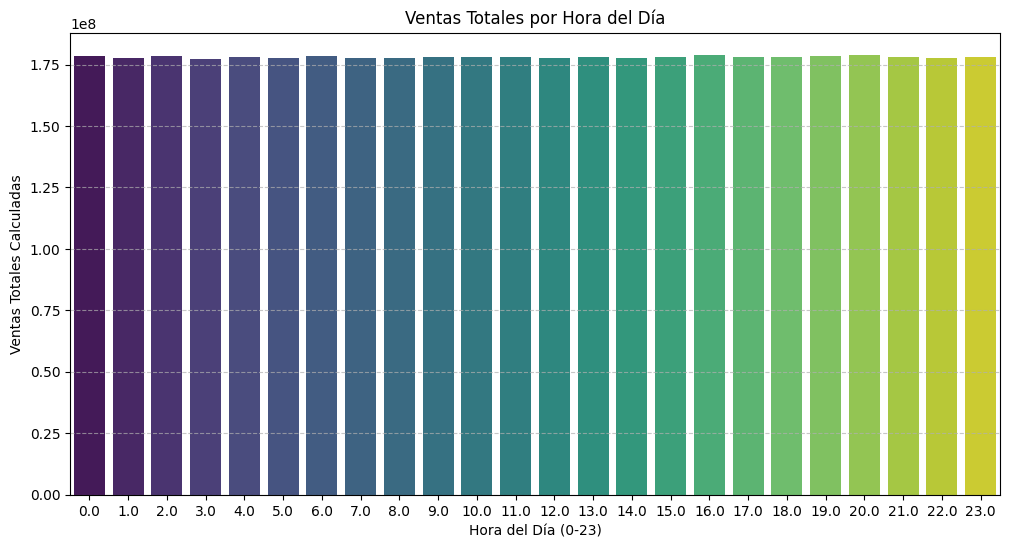


--- DataFrame con la nueva columna 'DayType' (primeras 5 filas) ---
                SalesDate        DayType  TotalPriceCalculated
0 2018-02-05 07:38:25.430   Entre semana             309.63590
1 2018-02-02 16:03:31.150   Entre semana             437.82200
2 2018-05-03 19:31:56.880   Entre semana            1896.44160
3 2018-04-07 14:43:55.420  Fin de semana            1236.01384
4 2018-02-12 15:37:03.940   Entre semana             719.80200

--- Total de ventas (TotalPriceCalculated) por tipo de día ---
         DayType  TotalPriceCalculated
0   Entre semana          3.123405e+09
1  Fin de semana          1.192863e+09

--- Conclusión: La empresa vende más durante los DÍAS DE SEMANA. ---


C:\Users\arang\AppData\Local\Temp\ipykernel_680\3270546852.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayType', y='TotalPriceCalculated', data=sales_by_daytype, palette='coolwarm')


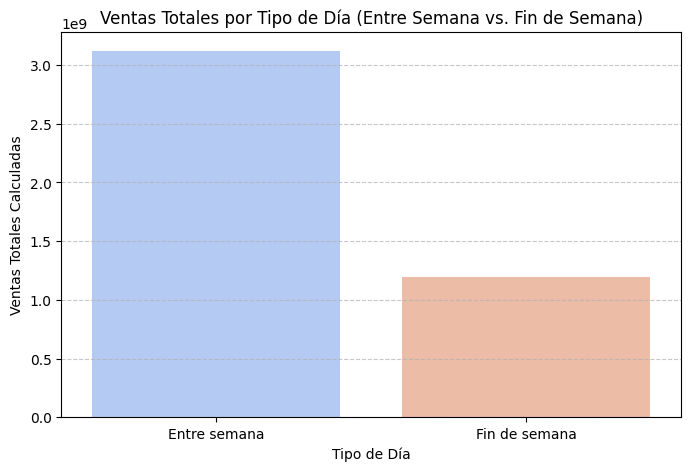

In [4]:
# Análisis de Ventas por Hora y Día de la Semana

try:
    df_merged['SalesDate'] = pd.to_datetime(df_merged['SalesDate'])
    print("--- La columna 'SalesDate' ha sido convertida a formato datetime exitosamente. ---")
except KeyError:
    print("ERROR: La columna 'SalesDate' no se encontró en el DataFrame.")
    exit()
except Exception as e:
    print(f"ERROR al convertir 'SalesDate' a datetime: {e}")
    print("Por favor, verifica el formato de los datos en tu columna 'SalesDate'.")
    exit()

# Crear una nueva columna 'SalesHour' con la hora de la venta
df_merged['SalesHour'] = df_merged['SalesDate'].dt.hour

print("\n--- DataFrame con la nueva columna 'SalesHour' (primeras 5 filas) ---")
print(df_merged[['SalesDate', 'SalesHour', 'TotalPriceCalculated']].head())

# 3. Identificar en qué hora del día se concentran más ventas totales
sales_by_hour = df_merged.groupby('SalesHour')['TotalPriceCalculated'].sum().reset_index()
peak_hour = sales_by_hour.loc[sales_by_hour['TotalPriceCalculated'].idxmax()]

print(f"\n--- Hora del día con mayor concentración de ventas totales ---")
print(f"La hora del día en la que se concentran más ventas totales es la hora {int(peak_hour['SalesHour'])}.")
print(f"Total de ventas en esa hora: {peak_hour['TotalPriceCalculated']:.2f}")

# Opcional: Visualización de ventas por hora
plt.figure(figsize=(12, 6))
sns.barplot(x='SalesHour', y='TotalPriceCalculated', data=sales_by_hour, palette='viridis')
plt.title('Ventas Totales por Hora del Día')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Ventas Totales Calculadas')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Clasificar registros como Entre semana o Fin de semana
# Los días de la semana en dt.dayofweek son: Lunes=0, Martes=1, Sábado=5, Domingo=6
df_merged['DayType'] = df_merged['SalesDate'].dt.dayofweek.apply(
    lambda x: 'Fin de semana' if x >= 5 else 'Entre semana'
)

print("\n--- DataFrame con la nueva columna 'DayType' (primeras 5 filas) ---")
print(df_merged[['SalesDate', 'DayType', 'TotalPriceCalculated']].head())

# Comparar el total de ventas (TotalPriceCalculated) entre ambos grupos
sales_by_daytype = df_merged.groupby('DayType')['TotalPriceCalculated'].sum().reset_index()

print("\n--- Total de ventas (TotalPriceCalculated) por tipo de día ---")
print(sales_by_daytype)

# Determinar si la empresa vende más durante los días de semana o en el fin de semana
if 'Entre semana' in sales_by_daytype['DayType'].values and 'Fin de semana' in sales_by_daytype['DayType'].values:
    ventas_entre_semana = sales_by_daytype.loc[sales_by_daytype['DayType'] == 'Entre semana', 'TotalPriceCalculated'].iloc[0]
    ventas_fin_semana = sales_by_daytype.loc[sales_by_daytype['DayType'] == 'Fin de semana', 'TotalPriceCalculated'].iloc[0]

    if ventas_entre_semana > ventas_fin_semana:
        print("\n--- Conclusión: La empresa vende más durante los DÍAS DE SEMANA. ---")
    else:
        print("\n--- Conclusión: La empresa vende más durante el FIN DE SEMANA. ---")
else:
    print("\nNo hay datos para ambos tipos de día ('Entre semana' y 'Fin de semana') para realizar la comparación completa.")


# Visualización de ventas por tipo de día
plt.figure(figsize=(8, 5))
sns.barplot(x='DayType', y='TotalPriceCalculated', data=sales_by_daytype, palette='coolwarm')
plt.title('Ventas Totales por Tipo de Día (Entre Semana vs. Fin de Semana)')
plt.xlabel('Tipo de Día')
plt.ylabel('Ventas Totales Calculadas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como parte del proceso de feature engineering, en el mismo df que vienes trabajando, calcula dos nuevas columnas en el dataset de ventas

In [5]:
# --- Celda 5: Feature Engineering - Edad y Experiencia del Empleado ---

# 1. Cargar el DataFrame de empleados (si no se ha cargado antes)
try:
    if 'df_employees' not in locals() and 'df_employees' not in globals():
        df_employees = pd.read_csv('employees.csv')
        print("¡Archivo 'employees.csv' cargado exitosamente!")
    else:
        print("'df_employees' ya está cargado. Continuando.")
except FileNotFoundError:
    print("ERROR: Asegúrate de que 'employees.csv' esté en la misma carpeta que este cuaderno.")
    print("No se puede calcular la edad del empleado y la experiencia sin este archivo.")
    raise FileNotFoundError("employees.csv no encontrado. No se puede continuar con este análisis.")


# Mostrar las primeras filas y la información de df_employees para verificar fechas y EmployeeID
print("\n--- DEPURACIÓN: df_employees al inicio de Celda 5 ---")
print("Columnas de df_employees:", df_employees.columns.tolist())
print("Primeras filas de df_employees (BirthDate, HireDate):")
print(df_employees[['EmployeeID', 'BirthDate', 'HireDate']].head())
print("Info de df_employees:")
df_employees.info()


# 2. Asegurarse de que las columnas de fecha estén en formato datetime en df_employees
print("\n--- DEPURACIÓN: Verificando y convirtiendo tipos de fecha en df_employees ---")
for col in ['BirthDate', 'HireDate']:
    if col in df_employees.columns:
        initial_nulls = df_employees[col].isnull().sum()
        df_employees[col] = pd.to_datetime(df_employees[col], errors='coerce')
        final_nulls = df_employees[col].isnull().sum()
        if final_nulls > initial_nulls:
            print(f"Advertencia: {final_nulls - initial_nulls} nuevos valores nulos en '{col}' después de la conversión en df_employees. Revise el formato original.")
        else:
            print(f"'{col}' convertido a datetime exitosamente en df_employees. Nulos: {final_nulls}.")
    else:
        print(f"ERROR CRÍTICO: La columna '{col}' NO se encontró en df_employees. Esto debería haber detenido la ejecución antes.")
        raise KeyError(f"Columna '{col}' no encontrada en df_employees.")


# Asegurarse de que 'SalesDate' en df_merged también esté en formato datetime
print("\n--- DEPURACIÓN: Verificando y convirtiendo SalesDate en df_merged ---")
if 'SalesDate' in df_merged.columns:
    initial_nulls = df_merged['SalesDate'].isnull().sum()
    df_merged['SalesDate'] = pd.to_datetime(df_merged['SalesDate'], errors='coerce')
    final_nulls = df_merged['SalesDate'].isnull().sum()
    if final_nulls > initial_nulls:
        print(f"Advertencia: {final_nulls - initial_nulls} nuevos valores nulos en 'SalesDate' después de la conversión en df_merged. Revise el formato original.")
    else:
        print(f"'SalesDate' convertido a datetime exitosamente en df_merged. Nulos: {final_nulls}.")
else:
    print("ERROR CRÍTICO: La columna 'SalesDate' no se encontró en df_merged. Esto debería haber detenido la ejecución antes.")
    raise KeyError("Columna 'SalesDate' no encontrada en df_merged antes del merge.")


print("\n--- DEPURACIÓN: df_merged (ventas) justo antes del merge con empleados ---")
print("Columnas de df_merged:", df_merged.columns.tolist())
print("Primeras filas de df_merged (SalesID, SalesPersonID, SalesDate):")
print(df_merged[['SalesID', 'SalesPersonID', 'SalesDate']].head())


# 3. Fusionar df_merged con df_employees para obtener las fechas necesarias
print("\n--- DEPURACIÓN: Realizando el merge para añadir datos de empleados ---")
if 'SalesPersonID' in df_merged.columns and 'EmployeeID' in df_employees.columns:
    df_merged = pd.merge(
        df_merged,
        df_employees[['EmployeeID', 'BirthDate', 'HireDate']],
        left_on='SalesPersonID',  # Columna en df_merged
        right_on='EmployeeID',    # Columna en df_employees
        how='left'
    )
    print("Merge completado.")

    print("\n--- DEPURACIÓN: Columnas de df_merged INMEDIATAMENTE DESPUÉS del merge ---")
    cols_after_initial_merge = df_merged.columns.tolist()
    print(cols_after_initial_merge)

    # **PASO CLAVE: IDENTIFICAR Y RENOMBRAR LAS COLUMNAS DE FECHA CORRECTAS**
    # Primero, intentamos eliminar cualquier columna duplicada antes de intentar renombrar,
    # para asegurar que df_merged['nombre'] devuelva una Series, no un DataFrame.
    # Esto es crucial para solucionar el AttributeError que podrías tener.
    df_merged = df_merged.loc[:,~df_merged.columns.duplicated(keep='first')]
    if len(cols_after_initial_merge) > len(df_merged.columns):
        print("Columnas duplicadas eliminadas, manteniendo la primera ocurrencia.")

    # Luego, identificamos la columna de fecha de nacimiento/contratación que ha sido traída por el merge.
    # Puede ser 'BirthDate', 'BirthDate_x', o 'BirthDate_y' dependiendo de si hubo conflicto de nombres.
    current_birth_date_col = None
    for col_name in ['BirthDate', 'BirthDate_x', 'BirthDate_y']:
        if col_name in df_merged.columns:
            current_birth_date_col = col_name
            break
    
    current_hire_date_col = None
    for col_name in ['HireDate', 'HireDate_x', 'HireDate_y']:
        if col_name in df_merged.columns:
            current_hire_date_col = col_name
            break

    if not current_birth_date_col:
        print("ERROR CRÍTICO: No se encontró una columna de 'BirthDate' adecuada después del merge.")
        print("Columnas disponibles:", df_merged.columns.tolist())
        raise KeyError("Columna 'BirthDate' de empleado no encontrada después del merge.")
    
    if not current_hire_date_col:
        print("ERROR CRÍTICO: No se encontró una columna de 'HireDate' adecuada después del merge.")
        print("Columnas disponibles:", df_merged.columns.tolist())
        raise KeyError("Columna 'HireDate' de empleado no encontrada después del merge.")

    # Renombramos las columnas identificadas a los nombres finales_Merged
    df_merged.rename(columns={current_birth_date_col: 'BirthDate_Merged',
                               current_hire_date_col: 'HireDate_Merged'}, inplace=True)
    print(f"Columnas '{current_birth_date_col}' y '{current_hire_date_col}' renombradas a 'BirthDate_Merged' y 'HireDate_Merged'.")


    # Limpiar cualquier otra columna con sufijo '_x' o '_y' o 'EmployeeID' que no sea SalesPersonID
    cols_to_drop_final = [col for col in df_merged.columns if col.endswith('_x') or col.endswith('_y') or col == 'EmployeeID']
    # Asegurarse de no eliminar SalesPersonID o las nuevas columnas _Merged
    cols_to_drop_final = [c for c in cols_to_drop_final if c not in ['SalesPersonID', 'BirthDate_Merged', 'HireDate_Merged']]
    if cols_to_drop_final:
        df_merged.drop(columns=cols_to_drop_final, errors='ignore', inplace=True)
        print(f"Columnas redundantes finales eliminadas: {cols_to_drop_final}")


    print("\n--- DEPURACIÓN: Columnas de df_merged DESPUÉS de la limpieza y renombre final ---")
    print(df_merged.columns.tolist())
    print("\n--- DEPURACIÓN: Primeras filas de df_merged con columnas de fecha (renombradas) ---")
    # Intentar imprimir con los nombres renombrados
    try:
        print(df_merged[['SalesID', 'SalesPersonID', 'SalesDate', 'BirthDate_Merged', 'HireDate_Merged']].head())
    except KeyError as e:
        print(f"ERROR: No se pudieron encontrar las columnas renombradas para la impresión final. {e}")
        print("Columnas actuales de df_merged:", df_merged.columns.tolist())


else:
    print("ERROR CRÍTICO: Las columnas de ID de empleado ('SalesPersonID' o 'EmployeeID') no se encontraron en uno o ambos DataFrames para la fusión.")
    raise KeyError("Columnas de ID de empleado faltantes para la fusión.")


# AÑADIR ESTAS LÍNEAS DE DEPURACIÓN JUSTO ANTES DE LOS CÁLCULOS
print("\n--- DEPURACIÓN FINAL: Verificando Dtypes y tipos de elementos ANTES DEL CÁLCULO ---")
if 'HireDate_Merged' in df_merged.columns and 'BirthDate_Merged' in df_merged.columns:
    print("Dtype de 'HireDate_Merged':", df_merged['HireDate_Merged'].dtype)
    print("Dtype de 'BirthDate_Merged':", df_merged['BirthDate_Merged'].dtype)

    print("Tipos de elementos (primeros 5 no nulos) en 'HireDate_Merged':")
    print(df_merged['HireDate_Merged'].dropna().head().apply(type))
    print("Tipos de elementos (primeros 5 no nulos) en 'BirthDate_Merged':")
    print(df_merged['BirthDate_Merged'].dropna().head().apply(type))

    print("Conteo de valores nulos en 'HireDate_Merged':", df_merged['HireDate_Merged'].isnull().sum())
    print("Conteo de valores nulos en 'BirthDate_Merged':", df_merged['BirthDate_Merged'].isnull().sum())
else:
    print("ERROR: Las columnas 'HireDate_Merged' o 'BirthDate_Merged' NO SE ENCONTRARON para verificar tipos. Esto debería haber sido capturado antes.")
    raise KeyError("Columnas 'HireDate_Merged' o 'BirthDate_Merged' faltantes para el cálculo.")


# 4. Calcular 'EmployeeAgeAtHire' (Edad del empleado al momento de la contratación)
print("\n--- Calculando EmployeeAgeAtHire ---")
# Ahora, la condición de existencia de las columnas debería ser redundante si la lógica anterior funcionó bien
if 'HireDate_Merged' in df_merged.columns and 'BirthDate_Merged' in df_merged.columns:
    df_merged['EmployeeAgeAtHire'] = (df_merged['HireDate_Merged'] - df_merged['BirthDate_Merged']).dt.days / 365.25
    print("EmployeeAgeAtHire calculado exitosamente.")
else:
    # Esta parte solo se ejecutaría si hay un error muy inusual después de todas las verificaciones
    print("ERROR CRÍTICO: Las columnas renombradas no están disponibles para el cálculo de edad.")
    raise KeyError("Columnas 'HireDate_Merged' o 'BirthDate_Merged' faltantes para el cálculo de edad del empleado.")


# 5. Calcular 'EmployeeExperienceAtSale' (Años de experiencia al momento de la venta)
print("\n--- Calculando EmployeeExperienceAtSale ---")
if 'SalesDate' in df_merged.columns and 'HireDate_Merged' in df_merged.columns:
    df_merged['EmployeeExperienceAtSale'] = (df_merged['SalesDate'] - df_merged['HireDate_Merged']).dt.days / 365.25
    print("EmployeeExperienceAtSale calculado exitosamente.")
else:
    print("ERROR CRÍTICO: 'SalesDate' o 'HireDate_Merged' NO ESTÁN PRESENTES en df_merged para el cálculo de experiencia.")
    raise KeyError("Columnas 'SalesDate' o 'HireDate_Merged' faltantes para el cálculo de experiencia del empleado.")


# Mostrar las primeras filas con las nuevas columnas
print("\n--- DataFrame con las nuevas columnas 'EmployeeAgeAtHire' y 'EmployeeExperienceAtSale' (primeras 5 filas) ---")
print(df_merged[['SalesID', 'SalesDate', 'BirthDate_Merged', 'HireDate_Merged', 'EmployeeAgeAtHire', 'EmployeeExperienceAtSale']].head())

# Mostrar estadísticas descriptivas de las nuevas columnas para verificar rangos
print("\n--- Estadísticas Descriptivas de EmployeeAgeAtHire ---")
print(df_merged['EmployeeAgeAtHire'].describe())
print("\n--- Estadísticas Descriptivas de EmployeeExperienceAtSale ---")
print(df_merged['EmployeeExperienceAtSale'].describe())

¡Archivo 'employees.csv' cargado exitosamente!

--- DEPURACIÓN: df_employees al inicio de Celda 5 ---
Columnas de df_employees: ['EmployeeID', 'FirstName', 'MiddleInitial', 'LastName', 'BirthDate', 'Gender', 'CityID', 'HireDate']
Primeras filas de df_employees (BirthDate, HireDate):
   EmployeeID                BirthDate                 HireDate
0           1  1981-03-07 00:00:00.000  2011-06-20 07:15:36.920
1           2  1968-01-25 00:00:00.000  2011-04-27 04:07:56.930
2           3  1963-02-09 00:00:00.000  2012-03-30 18:55:23.270
3           4  1989-02-06 00:00:00.000  2014-03-06 06:55:02.780
4           5  1963-05-03 00:00:00.000  2014-11-16 22:59:54.720
Info de df_employees:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmployeeID     23 non-null     int64 
 1   FirstName      23 non-null     object
 2   MiddleInitial  23 non-null     